#Data Cleaning

In [89]:
import pandas as pd

max_data = pd.read_csv("Dataset Generation (Max) (Responses) - Form Responses 1.csv")
fardina_data = pd.read_csv("Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")

merged_data = pd.concat([max_data, fardina_data], ignore_index=True)
merged_data.head()

,Timestamp,What year are you?,How old are you?,You could describe the adults you grew up with as...,You could describe yourself as...,How would you rate your religiousness / spirituality?,What bests represents your gender?,"My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?","My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?","I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?",...,"My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says ""nephew loves you so much"" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?","I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?","I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?","One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?","I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I

In [90]:
#rename column
rename = {
    "What year are you?": "Academic_Level",
    "How old are you?": "Age",
    "You could describe the adults you grew up with as...": "Adult_PoliticView",
    "You could describe yourself as...": "Personal_PoliticView",
    "How would you rate your religiousness / spirituality?": "Personal_Religiousness",
    "What bests represents your gender?": "Gender",
    "Would you describe yourself as compassionate?": "Personal_Compassion",
    "My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?": "Scenario_DoctorGF",
    "My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?": "Scenario_DaughterWedding",
    "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?": "Scenario_TrustFund",
    "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.": "Scenario_SchoolFees",
    "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?": "Scenario_LostCat",
    "My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?": "Scenario_NieceFood",
    "My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?": "Scenario_FlightHelp",
    "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?": "Scenario_ChildSupport",
    "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?": "Scenario_ExChildSupport",
    "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?": "Scenario_SchoolChoice",
    "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?": "Scenario_MILBoyfriend",
    "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?": "Scenario_WeddingDonation",
    "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?": "Scenario_WifeDrinking",
    "My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?": "Scenario_BridesmaidHair"
    }

merged_data.rename(columns=rename, inplace=True)
merged_data.columns


Index(['Timestamp', 'Academic_Level', 'Age', 'Adult_PoliticView',
       'Personal_PoliticView', 'Personal_Religiousness', 'Gender',
       'Scenario_DoctorGF', 'Scenario_DaughterWedding', 'Scenario_TrustFund',
       'Scenario_SchoolFees', 'Scenario_LostCat', 'Scenario_NieceFood',
       'Scenario_FlightHelp', 'Scenario_ChildSupport',
       'Scenario_ExChildSupport', 'Scenario_SchoolChoice',
       'Scenario_MILBoyfriend', 'Scenario_WeddingDonation',
       'Scenario_WifeDrinking', 'Scenario_BridesmaidHair',
       'Personal_Compassion',
       'My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?'],
      dtype='object')

In [91]:
# typo in the column name, so we merged the last column with the wife drinking column
merged_data['Scenario_WifeDrinking'] = merged_data['Scenario_WifeDrinking'].combine_first(merged_data['My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?'])

# drop  the one with long name
merged_data.drop('My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?', axis=1, inplace=True)

#remove timestamp (irrelevant in analysis)
merged_data.drop('Timestamp', axis=1, inplace=True)


merged_data.columns


Index(['Academic_Level', 'Age', 'Adult_PoliticView', 'Personal_PoliticView',
       'Personal_Religiousness', 'Gender', 'Scenario_DoctorGF',
       'Scenario_DaughterWedding', 'Scenario_TrustFund', 'Scenario_SchoolFees',
       'Scenario_LostCat', 'Scenario_NieceFood', 'Scenario_FlightHelp',
       'Scenario_ChildSupport', 'Scenario_ExChildSupport',
       'Scenario_SchoolChoice', 'Scenario_MILBoyfriend',
       'Scenario_WeddingDonation', 'Scenario_WifeDrinking',
       'Scenario_BridesmaidHair', 'Personal_Compassion'],
      dtype='object')

In [92]:
#null values
missing_values = merged_data.isnull().sum()
missing_values

Academic_Level                4
Age                           5
Adult_PoliticView             5
Personal_PoliticView          5
Personal_Religiousness        5
Gender                        5
Scenario_DoctorGF             6
Scenario_DaughterWedding      6
Scenario_TrustFund            8
Scenario_SchoolFees          10
Scenario_LostCat              8
Scenario_NieceFood            9
Scenario_FlightHelp          11
Scenario_ChildSupport        13
Scenario_ExChildSupport      14
Scenario_SchoolChoice         9
Scenario_MILBoyfriend        12
Scenario_WeddingDonation     12
Scenario_WifeDrinking        12
Scenario_BridesmaidHair      10
Personal_Compassion         101
dtype: int64

In [93]:
# impute missing values

# impute with mode
main_column = [
    'Academic_Level',
    'Adult_PoliticView',
    'Personal_PoliticView',
    'Personal_Religiousness',
    'Gender']
for col in main_column:
    merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)


scenario_columns = [
    'Scenario_DoctorGF',
    'Scenario_DaughterWedding',
    'Scenario_TrustFund',
    'Scenario_SchoolFees',
    'Scenario_LostCat',
    'Scenario_NieceFood',
    'Scenario_FlightHelp',
    'Scenario_ChildSupport',
    'Scenario_ExChildSupport',
    'Scenario_SchoolChoice',
    'Scenario_MILBoyfriend',
    'Scenario_WeddingDonation',
    'Scenario_WifeDrinking',
    'Scenario_BridesmaidHair'
]
for col in scenario_columns:
    merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)

# age (50+ outlier)
merged_data = merged_data[merged_data['Age'] != '50+']
# impute age with median
merged_data['Age'].fillna(merged_data['Age'].median(), inplace=True)

#correct typo in gender column
merged_data['Gender'] = merged_data['Gender'].replace('Famale', 'Female')

# drop duplicate rows
merged_data = merged_data.drop_duplicates()

#null values
missing_values = merged_data.isnull().sum()
missing_values

<ipython-input-93-918bd556ba50>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Age'].fillna(merged_data['Age'].median(), inplace=True)
<ipython-input-93-918bd556ba50>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Gender'] = merged_data['Gender'].replace('Famale', 'Female')


Academic_Level               0
Age                          0
Adult_PoliticView            0
Personal_PoliticView         0
Personal_Religiousness       0
Gender                       0
Scenario_DoctorGF            0
Scenario_DaughterWedding     0
Scenario_TrustFund           0
Scenario_SchoolFees          0
Scenario_LostCat             0
Scenario_NieceFood           0
Scenario_FlightHelp          0
Scenario_ChildSupport        0
Scenario_ExChildSupport      0
Scenario_SchoolChoice        0
Scenario_MILBoyfriend        0
Scenario_WeddingDonation     0
Scenario_WifeDrinking        0
Scenario_BridesmaidHair      0
Personal_Compassion         97
dtype: int64

In [94]:
#null values
missing_values = merged_data.isnull().sum()
missing_values

Academic_Level               0
Age                          0
Adult_PoliticView            0
Personal_PoliticView         0
Personal_Religiousness       0
Gender                       0
Scenario_DoctorGF            0
Scenario_DaughterWedding     0
Scenario_TrustFund           0
Scenario_SchoolFees          0
Scenario_LostCat             0
Scenario_NieceFood           0
Scenario_FlightHelp          0
Scenario_ChildSupport        0
Scenario_ExChildSupport      0
Scenario_SchoolChoice        0
Scenario_MILBoyfriend        0
Scenario_WeddingDonation     0
Scenario_WifeDrinking        0
Scenario_BridesmaidHair      0
Personal_Compassion         97
dtype: int64

#question 1

In [95]:
import numpy as np
import scipy.stats as stats


# convert the religion column into numbers
religiousness_map = {
    "Not spiritual at all": 1,
    "Somewhat spiritual": 2,
    "Strongly spiritual": 3
}
merged_data['Religiousness_Scale'] = merged_data['Personal_Religiousness'].map(religiousness_map)

# for each scenario, create  binary column to indicates whether the response was absolute (1) or relative (0)
def absolute_judgment(value):
    if value in ['Jerk', 'Not a jerk']:
        return 1
    else:
        return 0

for col in scenario_columns:
    merged_data[col + '_Absolute'] = merged_data[col].apply(absolute_judgment)

# check total absolute judgments
merged_data['Total_Absolute_Judgments'] = merged_data[[col + '_Absolute' for col in scenario_columns]].sum(axis=1)

grouped_data = merged_data.groupby('Religiousness_Scale')['Total_Absolute_Judgments'].describe()
grouped_data

,count,mean,std,min,25%,50%,75%,max
Religiousness_Scale,,,,,,,,
1,105.0,6.304762,2.085314,1.0,5.0,6.0,8.0,11.0
2,91.0,5.714286,2.310775,0.0,4.0,6.0,7.0,14.0
3,38.0,5.368421,2.271100,0.0,4.0,5.0,6.0,11.0


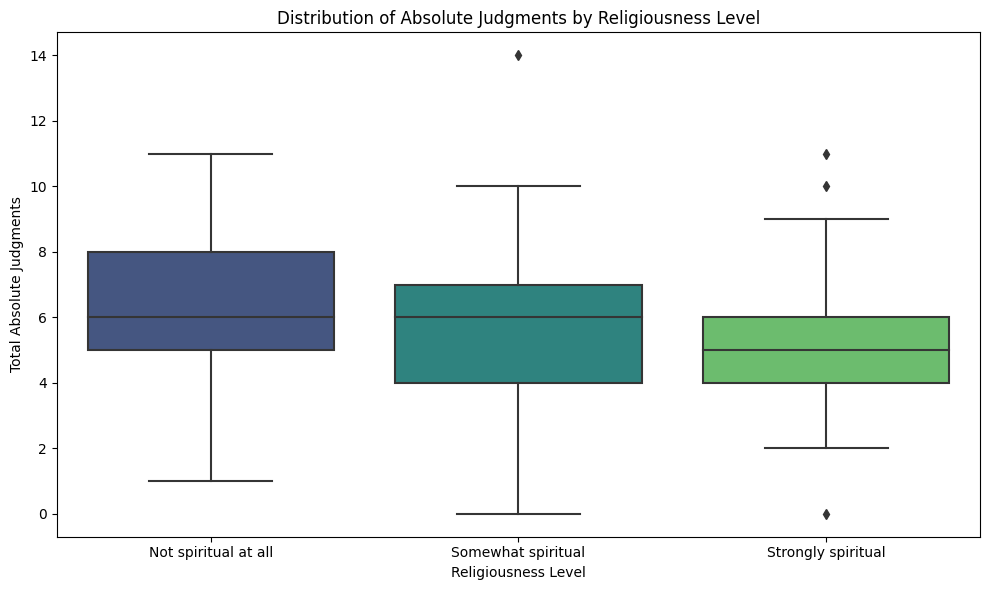

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# absolute judgement by religiousness
plt.figure(figsize=(10, 6))
sns.boxplot(x='Religiousness_Scale', y='Total_Absolute_Judgments', data=merged_data, palette='viridis')
plt.title('Distribution of Absolute Judgments by Religiousness Level')
plt.xlabel('Religiousness Level')
plt.ylabel('Total Absolute Judgments')
plt.xticks(ticks=[0, 1, 2], labels=['Not spiritual at all', 'Somewhat spiritual', 'Strongly spiritual'])
plt.tight_layout()
plt.show()



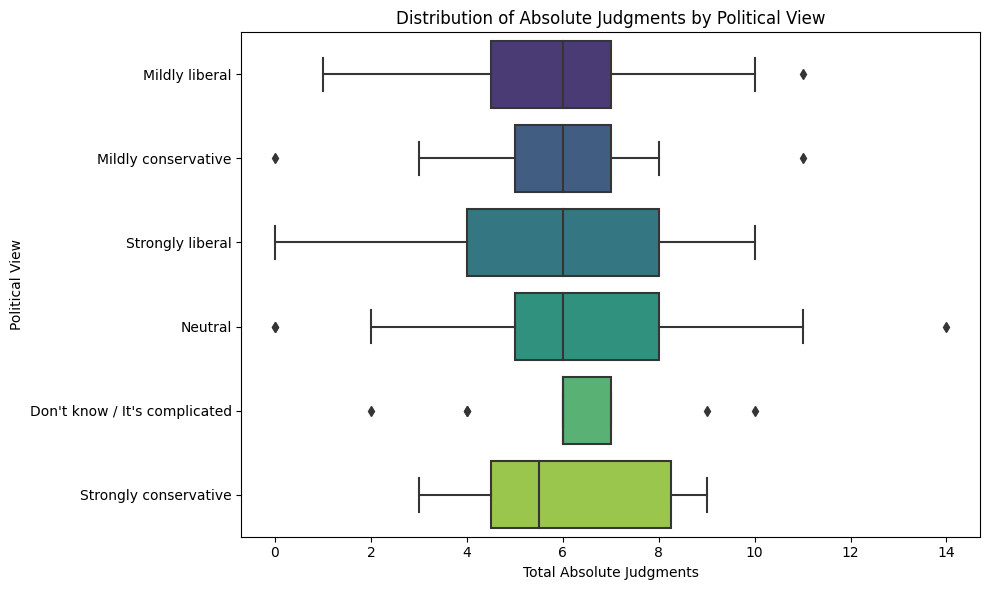

In [97]:
# switch axes for better visualization
plt.figure(figsize=(10, 6))
sns.boxplot(y='Personal_PoliticView', x='Total_Absolute_Judgments', data=merged_data, palette='viridis')
plt.title('Distribution of Absolute Judgments by Political View')
plt.ylabel('Political View')
plt.xlabel('Total Absolute Judgments')
plt.tight_layout()
plt.show()


part 2: check both in regards to moral absolutism

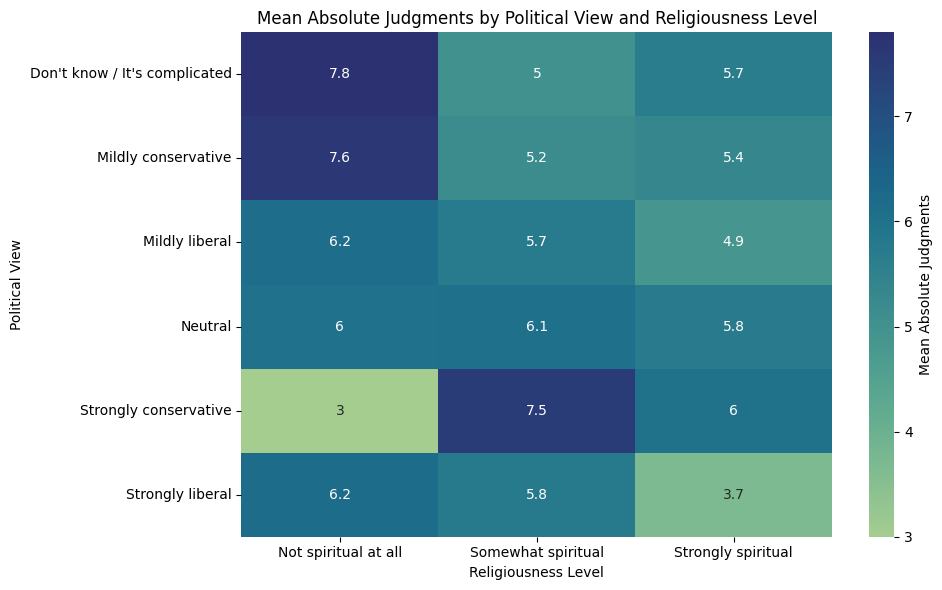

In [98]:
# prep data for heatmap
heatmap_data = merged_data.groupby(['Personal_PoliticView', 'Personal_Religiousness'])['Total_Absolute_Judgments'].mean().unstack()


# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='crest', cbar_kws={'label': 'Mean Absolute Judgments'})
plt.title('Mean Absolute Judgments by Political View and Religiousness Level')
plt.xlabel('Religiousness Level')
plt.ylabel('Political View')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Not spiritual at all', 'Somewhat spiritual', 'Strongly spiritual'])
plt.tight_layout()
plt.show()


hypothesis testing

In [99]:
# anova for religiousness
_, p_value_religiousness = stats.f_oneway(
    merged_data[merged_data['Personal_Religiousness'] == "Not spiritual at all"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_Religiousness'] == "Somewhat spiritual"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_Religiousness'] == "Strongly spiritual"]['Total_Absolute_Judgments']
)
p_value_religiousness

0.04333832228047644

In [100]:
merged_data['Personal_PoliticView'].unique()

array(['Mildly liberal', 'Mildly conservative', 'Strongly liberal',
       'Neutral', "Don't know / It's complicated",
       'Strongly conservative'], dtype=object)

In [101]:
# anova for political view
_, p_value_political = stats.f_oneway(
    merged_data[merged_data['Personal_PoliticView'] == "Mildly liberal"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_PoliticView'] == "Mildly conservative"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_PoliticView'] == "Strongly liberal"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_PoliticView'] == "Neutral"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_PoliticView'] == "Don't know / It's complicated"]['Total_Absolute_Judgments'],
    merged_data[merged_data['Personal_PoliticView'] == "Strongly conservative"]['Total_Absolute_Judgments']
)
p_value_political

0.9963101056566553

#question 2

In [102]:
from scipy.stats import chi2_contingency

# chi square test
p_values = {}

for scenario in scenario_columns:
    contingency_table = pd.crosstab(merged_data['Adult_PoliticView'], merged_data[scenario])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[scenario] = p

p_values_df = pd.Series(p_values, name='p-value').reset_index()
p_values_df.columns = ['Scenario', 'p-value']
p_values_df['Significant at 0.05'] = p_values_df['p-value'] < 0.05

p_values_df


,Scenario,p-value,Significant at 0.05
0,Scenario_DoctorGF,0.523255,False
1,Scenario_DaughterWedding,0.023350,True
2,Scenario_TrustFund,0.690411,False
3,Scenario_SchoolFees,0.863531,False
4,Scenario_LostCat,0.034346,True
5,Scenario_NieceFood,0.253558,False
6,Scenario_FlightHelp,0.685748,False
7,Scenario_ChildSupport,0.800367,False
8,Scenario_ExChildSupport,0.129506,False
9,Scenario_SchoolChoice,0.773776,False


Scenario_DaughterWedding,Mildly a jerk,Not a jerk,Strongly a jerk
Adult_PoliticView,,,
Don't know / It's complicated,64.705882,35.294118,0.000000
Mildly conservative,27.142857,57.142857,15.714286
Mildly liberal,50.746269,35.820896,13.432836
Neutral,45.652174,39.130435,15.217391
Strongly conservative,30.000000,35.000000,35.000000
Strongly liberal,35.714286,42.857143,21.428571


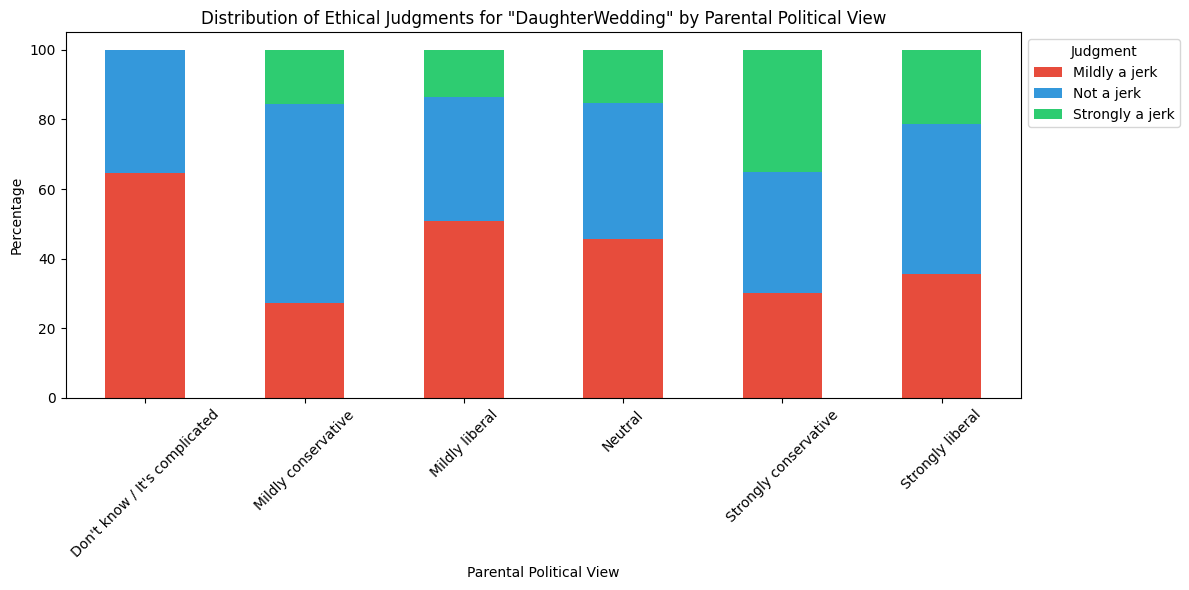

In [103]:
# daughter wedding plot prep
daughter_wedding_distribution = pd.crosstab(merged_data['Adult_PoliticView'], merged_data['Scenario_DaughterWedding'], normalize='index') * 100

# daughter wedding plot
plt.figure(figsize=(12, 6))
daughter_wedding_distribution.plot(kind='bar', stacked=True, color=['#e74c3c', '#3498db', '#2ecc71'], ax=plt.gca())
plt.title('Distribution of Ethical Judgments for "DaughterWedding" by Parental Political View')
plt.ylabel('Percentage')
plt.xlabel('Parental Political View')
plt.xticks(rotation=45)
plt.legend(title='Judgment', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

daughter_wedding_distribution


Scenario_LostCat,Mildly a jerk,Not a jerk,Strongly a jerk
Adult_PoliticView,,,
Don't know / It's complicated,35.294118,52.941176,11.764706
Mildly conservative,34.285714,44.285714,21.428571
Mildly liberal,40.298507,40.298507,19.402985
Neutral,32.608696,54.347826,13.043478
Strongly conservative,15.000000,60.000000,25.000000
Strongly liberal,28.571429,14.285714,57.142857


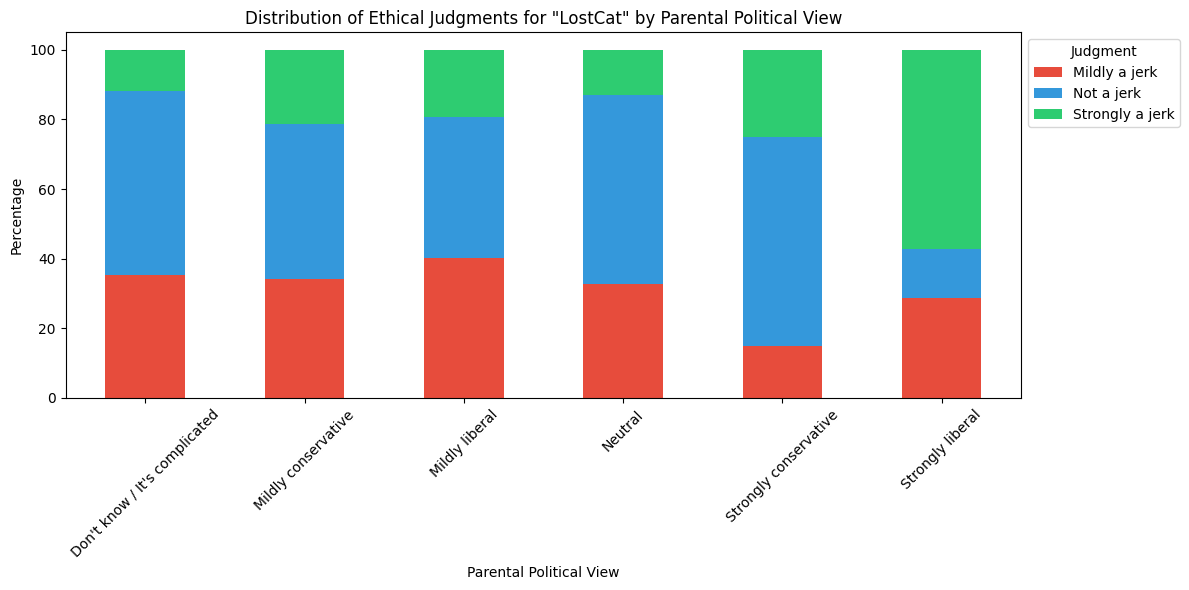

In [104]:
# lost cat plot prep
lostcat_distribution = pd.crosstab(merged_data['Adult_PoliticView'], merged_data['Scenario_LostCat'], normalize='index') * 100

# lost cat plop
plt.figure(figsize=(12, 6))
lostcat_distribution.plot(kind='bar', stacked=True, color=['#e74c3c', '#3498db', '#2ecc71'], ax=plt.gca())
plt.title('Distribution of Ethical Judgments for "LostCat" by Parental Political View')
plt.ylabel('Percentage')
plt.xlabel('Parental Political View')
plt.xticks(rotation=45)
plt.legend(title='Judgment', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

lostcat_distribution


Scenario_WeddingDonation,Mildly a jerk,Not a jerk,Strongly a jerk
Adult_PoliticView,,,
Don't know / It's complicated,29.411765,52.941176,17.647059
Mildly conservative,24.285714,58.571429,17.142857
Mildly liberal,28.358209,65.671642,5.970149
Neutral,30.434783,60.869565,8.695652
Strongly conservative,10.000000,50.000000,40.000000
Strongly liberal,21.428571,71.428571,7.142857


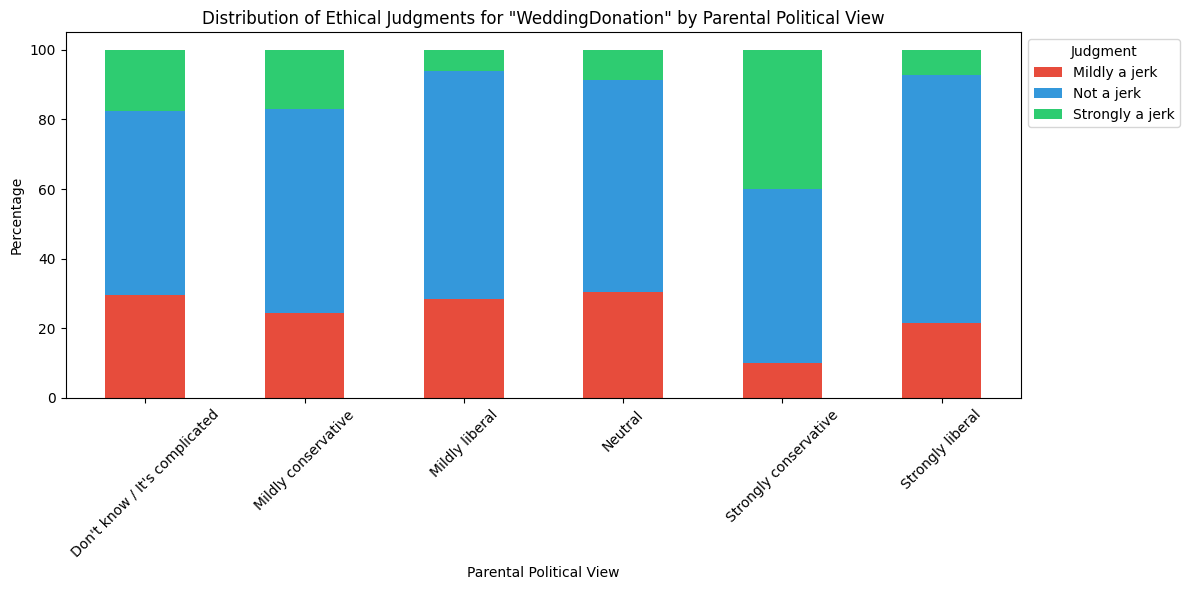

In [105]:
# wedding donation plot prep
wedding_donation_distribution = pd.crosstab(merged_data['Adult_PoliticView'], merged_data['Scenario_WeddingDonation'], normalize='index') * 100

# wedding donation plot
plt.figure(figsize=(12, 6))
wedding_donation_distribution.plot(kind='bar', stacked=True, color=['#e74c3c', '#3498db', '#2ecc71'], ax=plt.gca())
plt.title('Distribution of Ethical Judgments for "WeddingDonation" by Parental Political View')
plt.ylabel('Percentage')
plt.xlabel('Parental Political View')
plt.xticks(rotation=45)
plt.legend(title='Judgment', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

wedding_donation_distribution


#Q3


In [106]:
# filter Other in academic level, and filter age 40
df_filtered = merged_data[merged_data['Academic_Level'] != 'Other']
df_filtered = df_filtered[df_filtered['Age'] != '40']
df_filtered['Age'] = df_filtered['Age'].astype(int)

df_filtered['Academic_Level'].unique(), df_filtered['Age'].unique()


(array(['Junior', 'Senior', 'Sophmore', 'Freshman'], dtype=object),
 array([20, 19, 21, 22, 24, 26, 18, 23, 29, 17, 28, 25]))

In [107]:
# mapping scenario to score
score_mapping = {
    "Not a jerk": 1,
    "Mildly a jerk": 2,
    "Strongly a jerk": 3
}

df_transformed = df_filtered.copy()

# convert scenario responses to score using where() to avoid warning
for col in df_transformed.columns[6:]:
    df_transformed[col] = df_transformed[col].where(df_transformed[col].isin(score_mapping.values()), df_transformed[col].map(score_mapping))

# average score for  row based on the scenario response
df_transformed['avg_score'] = df_transformed.iloc[:, 6:-1].mean(axis=1)
df_transformed['avg_score'].head()


0    1.375000
1    1.363636
2    1.476190
3    1.750000
4    1.750000
Name: avg_score, dtype: float64

Statistic test

In [108]:
import scipy.stats as stats

# anova test for academic level vs ethical maturity score
_, p_value_academic = stats.f_oneway(
    df_transformed['avg_score'][df_transformed['Academic_Level'] == 'Freshman'],
    df_transformed['avg_score'][df_transformed['Academic_Level'] == 'Sophmore'],
    df_transformed['avg_score'][df_transformed['Academic_Level'] == 'Junior'],
    df_transformed['avg_score'][df_transformed['Academic_Level'] == 'Senior']
)

p_value_academic


0.15691980590716725

In [109]:
# anova test for age on ethical maturity score
_, p_value_age = stats.f_oneway(
    *[df_transformed['avg_score'][df_transformed['Age'] == age] for age in df_transformed['Age'].unique()]
)

p_value_age


0.5016058719861185

Visualization process:

In [110]:
# academic level and age plot prep
grouped_df = df_transformed.groupby(['Academic_Level', 'Age'])['avg_score'].mean().reset_index()


# sort data from acdemic level
order_mapping = {'Freshman': 1, 'Sophmore': 2, 'Junior': 3, 'Senior': 4}
grouped_df['level_order'] = grouped_df['Academic_Level'].map(order_mapping)
grouped_df = grouped_df.sort_values(by=['level_order', 'Age']).drop('level_order', axis=1)


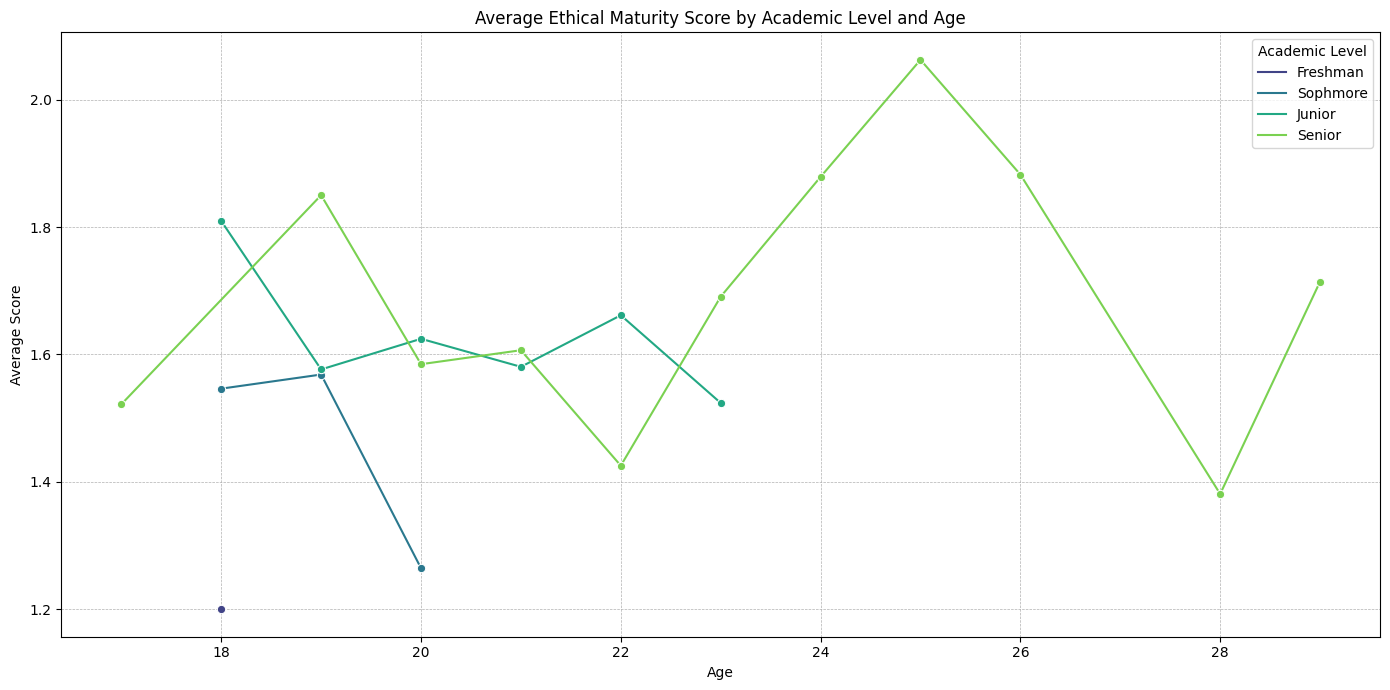

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_df, x='Age', y='avg_score', hue='Academic_Level', marker='o', palette='viridis')
plt.title('Average Ethical Maturity Score by Academic Level and Age')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.legend(title='Academic Level')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
